In [1]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
import statsmodels
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.stattools import arma_order_select_ic
from statsmodels.tsa.arima.model import ARIMA

In [3]:
import pandas as pd
data = pd.read_csv("data.csv").iloc[:5000,-1]
train = data[:4000]
test = data[4000:]

In [4]:
data

0       3416.0
1       4755.0
2       4939.0
3       4939.0
4       4998.0
         ...  
4995    1280.0
4996    1144.0
4997    1046.0
4998     966.0
4999     966.0
Name: MW, Length: 5000, dtype: float64

In [6]:
train = train.interpolate(method = "cubicspline")

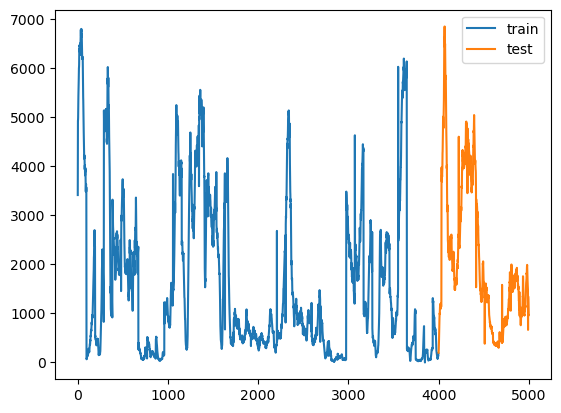

In [10]:
plt.plot(train, label = "train")
plt.plot(test, label = "test")
plt.legend()
plt.show()

In [11]:
adfuller(train) ## No unit root


(-5.491927402201158,
 2.165570665571206e-06,
 11,
 3988,
 {'1%': -3.4319908009332663,
  '5%': -2.8622650160989567,
  '10%': -2.5671559338924497},
 54419.498855701524)

<function statsmodels.graphics.tsaplots.plot_acf(x, ax=None, lags=None, *, alpha=0.05, use_vlines=True, adjusted=False, fft=False, missing='none', title='Autocorrelation', zero=True, auto_ylims=False, bartlett_confint=True, vlines_kwargs=None, **kwargs)>

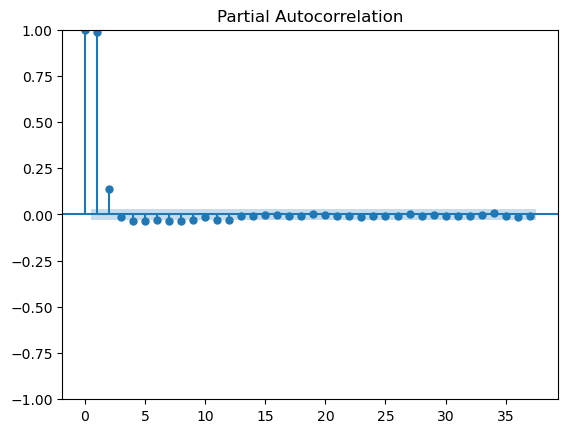

In [12]:
plot_pacf(train)

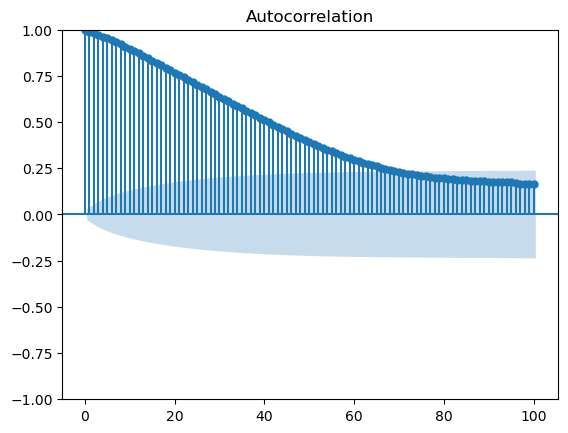

In [15]:
plot_acf(train, lags = 100);

In [33]:
model_train = ARIMA(train, order = (2,0,2))
model = model_train.fit()

In [34]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                     MW   No. Observations:                 4000
Model:                 ARIMA(2, 0, 2)   Log Likelihood              -27425.351
Date:                Thu, 23 May 2024   AIC                          54862.702
Time:                        17:16:58   BIC                          54900.466
Sample:                             0   HQIC                         54876.088
                               - 4000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1575.8433    370.476      4.254      0.000     849.723    2301.963
ar.L1          1.9337      0.022     86.173      0.000       1.890       1.978
ar.L2         -0.9348      0.022    -42.212      0.000      -0.978      -0.891
ma.L1         -1.1051      0.023    -48.873      0.000      -1.149      -1.061
ma.L2          0.1843      0.006     28.966      0.000       0.172       0.197
sigma2      5.278e+04    222.686    237.008      0.000    5.23e+04    5.32e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):           5022475.84
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               1.46   Skew:                             0.49
Prob(H) (two-sided):                  0.00   Kurtosis:                       176.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [35]:
acorr_ljungbox(model.resid, model_df = 4, lags = 25)

,lb_stat,lb_pvalue
1,0.590224,NaN
2,0.664125,NaN
3,0.679611,NaN
4,0.711342,NaN
5,0.717994,0.396803
6,0.821826,0.663045
7,0.930887,0.817968
8,0.987184,0.911733
9,1.079194,0.955929
10,1.713393,0.944083


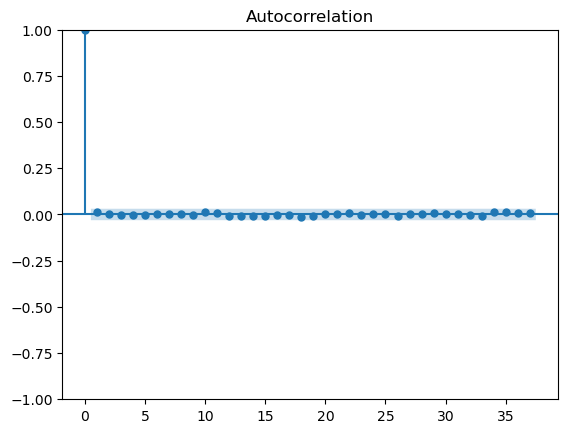

In [37]:
plot_acf(model.resid);

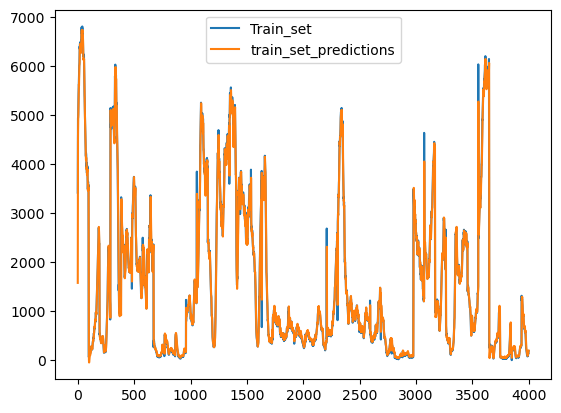

In [39]:
plt.plot(train, label = "Train_set")
plt.plot(model.predict(), label = "train_set_predictions")
plt.legend()
plt.show()

In [46]:
model_test = ARIMA(test, order = (2,0,2))
model_test_ = model_test.fit(start_params=model.params)

In [51]:
model_test_.params = model.params

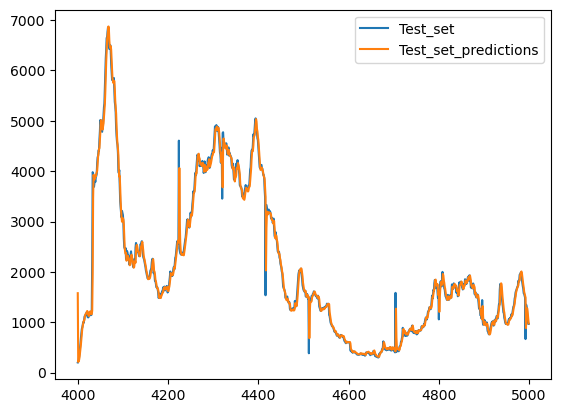

In [53]:
plt.plot(test, label = "Test_set")
plt.plot(model_test_.predict(), label = "Test_set_predictions")
plt.legend()
plt.show()

In [58]:
from sklearn.metrics import r2_score
r2_score(test, model_test_.predict()) 
## This is a pretty good value!!!

0.9835584948641737

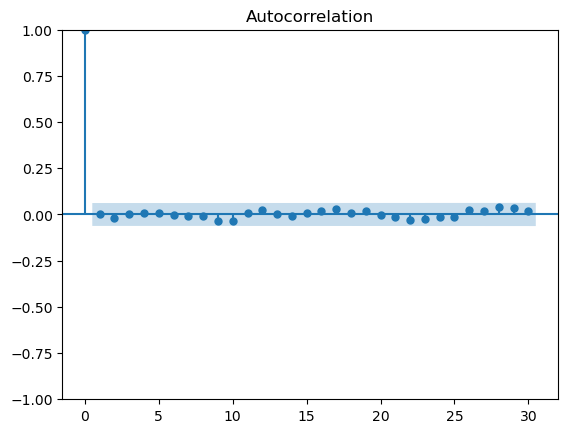

In [60]:
plot_acf(model_test_.resid); ## Ok this is great!!!!

In [61]:
acorr_ljungbox(model_test_.resid, model_df = 4, lags = 25)

,lb_stat,lb_pvalue
1,0.014006,NaN
2,0.423892,NaN
3,0.425422,NaN
4,0.519569,NaN
5,0.607917,0.435573
6,0.630749,0.729516
7,0.720125,0.868460
8,0.795762,0.939015
9,1.968816,0.853443
10,3.367014,0.761571


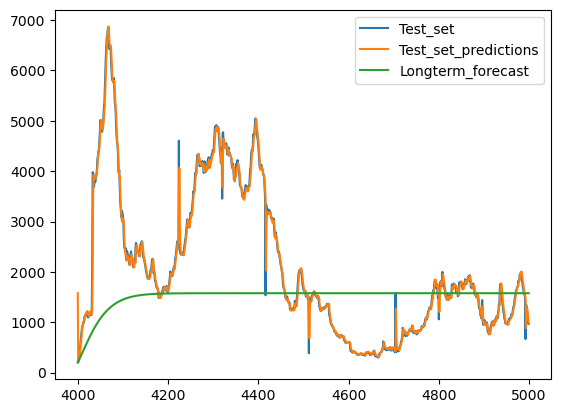

In [64]:
plt.plot(test, label = "Test_set")
plt.plot(model_test_.predict(), label = "Test_set_predictions")
plt.plot(model.forecast(1000), label = "Longterm_forecast")
plt.legend()
plt.show()